In [ ]:
# Importando as bibliotecas utilizadas para essa análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Lendo o arquivo csv já com as definições de separação, decimal, nulos e colunas numéricas
df = pd.read_csv('dados_originais.csv', sep=';', decimal=',', na_values=' ',
                 dtype={'Renda': 'float', 'Anos': 'Int64', 'Gasto': 'float', 'Minutos': 'Int64'})

df # Pré-visualização dos dados

,Tipo,Sexo,Opinião,Modelo,Outra,Razão,Renda,Anos,Gasto,Minutos
0,Pós-pago,Masculino,Mediana,Gradiente,Nenhuma,Qualidade do sinal,1.074,3,39.00,69
1,Pré-pago,Feminino,Mediana,Ericsson,Cum,Ma,1.491,4,50.20,66
2,Pós-pago,Masculino,Sofrível,Gradiente,Nenhuma,Qualidade do sinal,2.778,7,80.80,68
3,Pré-pago,Feminino,Mediana,Ericsson,Nenhuma,Maior cobertura,4.953,9,100.20,68
4,Pós-pago,Feminino,Sofrível,Gradiente,Nenhuma,Qualidade do sinal,2.748,3,43.60,71
...,...,...,...,...,...,...,...,...,...,...
4995,Pós-pago,Masculino,Mediana,Samsung,Cumbuca,Qualidade do sinal,8.967,2,30.52,79
4996,Pós-pago,Masculino,Sofrível,Samsung,Nenhuma,Qualidade do sinal,5.688,7,81.00,75
4997,Pré-pago,Masculino,Sofrível,Gradiente,Nenhuma,Qualidade do sinal,2.661,4,54.60,87
4998,Pré-pago,Feminino,Confiável,Motorola,Cumbuca,Maior cobertura,1.747,1,30.52,33


In [ ]:
# Multiplicando a coluna Renda por 1000
df['Renda'] = df['Renda'] * 1000

In [ ]:
df.dtypes

Tipo        object
Sexo        object
Opinião     object
Modelo      object
Outra       object
Razão       object
Renda      float64
Anos         Int64
Gasto      float64
Minutos      Int64
dtype: object

In [ ]:
# Quantidade de valores nulos em cada coluna
df.isna().sum()

Tipo        7
Sexo        7
Opinião    10
Modelo     10
Outra       4
Razão       3
Renda       4
Anos        4
Gasto       8
Minutos    11
dtype: int64

In [ ]:
# Verificando se há algum dado duplicado
df.duplicated().sum()

0

In [ ]:
# Resumo das colunas categóricas
df.describe(include=['object'])

,Tipo,Sexo,Opinião,Modelo,Outra,Razão
count,4993,4993,4990,4990,4996,4997
unique,12,12,23,26,26,16
top,Pré-pago,Masculino,Mediana,Motorola,Nenhuma,Maior cobertura
freq,2869,2716,1444,1466,1735,2723


In [ ]:
# Resumo das colunas numéricas
df.describe()

,Renda,Anos,Gasto,Minutos
count,4996.000000,4996.0,4992.000000,4989.0
mean,5796.388110,5.061249,61.515120,75.930447
std,4992.605217,2.058468,20.795596,21.122608
min,1003.000000,0.0,30.520000,18.0
25%,2046.000000,4.0,46.800000,65.0
50%,4248.000000,5.0,60.400000,75.0
75%,7758.000000,6.0,73.800000,85.0
max,43878.000000,40.0,348.000000,472.0


In [ ]:
# Valores únicos das colunas categóricas (inclusive os incompletos e quebrados)
for col in df.iloc[:,:6]:
  print(col, df[col].unique(), '\n')

Tipo ['Pós-pago' 'Pré-pago' 'Pós-pa ' nan 'Pó ' 'Pós- ' 'Pós ' 'Pré ' 'Pr '
 'Pós-p ' 'Pré-pa ' 'Pré-p ' 'Pré- '] 

Sexo ['Masculino' 'Feminino' 'Femi ' 'Ma ' nan 'Mas ' 'Femin ' 'Fem ' 'Fe '
 'Mascu ' 'Mascul ' 'Masc ' 'Femini '] 

Opinião ['Mediana' 'Sofrível' 'Excelente' 'Confiável' 'Terrível' 'Me ' 'Con '
 'Excele ' 'Terrí ' 'Medi ' 'Med ' nan 'Media ' 'Median ' 'Exce ' 'Te '
 'Confi ' 'Conf ' 'Sofrív ' 'So ' 'Sofrí ' 'Sofr ' 'Terr ' 'Ter '] 

Modelo ['Gradiente' 'Ericsson' 'Motorola' 'Siemens' 'Samsung' 'Sieme ' 'Motor '
 'Si ' 'Motoro ' nan 'Siemen ' 'Gradie ' 'Moto ' 'Erics ' 'Sam ' 'Sie '
 'Eric ' 'Gra ' 'Samsun ' 'Eri ' 'Sa ' 'Grad ' 'Mo ' 'Gr ' 'Gradi ' 'Mot '
 'Samsu '] 

Outra ['Nenhuma' 'Cum ' 'Mortinho' 'Ferrocom' 'Cumbuca' 'Escuridão' 'Ferro '
 'Esc ' 'Mort ' 'Ne ' 'Morti ' nan 'Fer ' 'Ferroc ' 'Escu ' 'Cu ' 'Mo '
 'Nen ' 'Mortin ' 'Nenhum ' 'Cumb ' 'Cumbu ' 'Fe ' 'Es ' 'Nenh ' 'Cumbuc '
 'Escuri '] 

Razão ['Qualidade do sinal' 'Ma ' 'Maior cobertura' 'Tarifa menor' 'Ma

In [ ]:
# Substituir os valores nas colunas categóricas (como tenho todos os valores únicos, fiz dessa maneira, mas há diversas outras)
df['Tipo'].replace(['Pós-pa ', 'Pó ', 'Pós- ', 'Pós ', 'Pós-p '], 'Pós-pago', inplace=True)
df['Tipo'].replace(['Pré ', 'Pr ', 'Pré-pa ', 'Pré-p ', 'Pré- '], 'Pré-pago', inplace=True)

df['Sexo'].replace(['Ma ', 'Mas ', 'Mascu ', 'Mascul ', 'Masc '], 'Masculino', inplace=True)
df['Sexo'].replace(['Femi ', 'Femin ', 'Fem ', 'Fe ', 'Femini '], 'Feminino', inplace=True)

df['Opinião'].replace(['Terrí ', 'Te ', 'Terr ', 'Ter '], 'Terrível', inplace=True)
df['Opinião'].replace(['Sofrív ', 'So ', 'Sofrí ', 'Sofr '], 'Sofrível', inplace=True)
df['Opinião'].replace(['Me ', 'Medi ', 'Med ', 'Media ', 'Median '], 'Mediana', inplace=True)
df['Opinião'].replace(['Con ', 'Confi ', 'Conf '], 'Confiável', inplace=True)
df['Opinião'].replace(['Excele ', 'Exce '], 'Excelente', inplace=True)

df['Modelo'].replace(['Erics ', 'Eric ', 'Eri '], 'Ericsson', inplace=True)
df['Modelo'].replace(['Gradie ', 'Gra ', 'Grad ', 'Gr ', 'Gradi '], 'Gradiente', inplace=True)
df['Modelo'].replace(['Motor ', 'Motoro ', 'Moto ', 'Mo ', 'Mot '], 'Motorola', inplace=True)
df['Modelo'].replace(['Sam ', 'Samsun ', 'Sa ', 'Samsu '], 'Samsung', inplace=True)
df['Modelo'].replace(['Sieme ', 'Si ', 'Siemen ', 'Sie '], 'Siemens', inplace=True)

df['Outra'].replace(['Cum ', 'Cu ', 'Cumb ', 'Cumbu ', 'Cumbuc '], 'Cumbuca', inplace=True)
df['Outra'].replace(['Esc ', 'Escu ', 'Es ', 'Escuri '], 'Escuridão', inplace=True)
df['Outra'].replace(['Ferro ', 'Fer ', 'Ferroc ', 'Fe '], 'Ferrocom', inplace=True)
df['Outra'].replace(['Mort ', 'Morti ', 'Mo ', 'Mortin '], 'Mortinho', inplace=True)
df['Outra'].replace(['Ne ', 'Nen ', 'Nenhum ', 'Nenh '], 'Nenhuma', inplace=True)

df['Razão'].replace(['Ma ', 'Mai ', 'Maio ', 'Maior ', 'Maior  '], 'Maior cobertura', inplace=True)
df['Razão'].replace(['Quali ', 'Qual ', 'Qua ', 'Qu '], 'Qualidade do sinal', inplace=True)
df['Razão'].replace(['Tar ', 'Ta ', 'Tarifa ', 'Tari '], 'Tarifa menor', inplace=True)

In [ ]:
# Convertendo as colunas categóricas do tipo 'object' para 'category'
for col in df.iloc[:,:6]:
  df[col] = df[col].astype('category')

df.dtypes

Tipo       category
Sexo       category
Opinião    category
Modelo     category
Outra      category
Razão      category
Renda       float64
Anos          Int64
Gasto       float64
Minutos       Int64
dtype: object

In [ ]:
# Preenchendo os valores nulos pela moda nas colunas categóricas
for col in df.iloc[:,:6]:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Resumo das colunas categóricas após as transformções
df.describe(include=['category'])

,Tipo,Sexo,Opinião,Modelo,Outra,Razão
count,5000,5000,5000,5000,5000,5000
unique,2,2,5,5,5,3
top,Pré-pago,Masculino,Mediana,Motorola,Nenhuma,Maior cobertura
freq,2898,2749,1471,1490,1750,2756


In [ ]:
# Preenchendo os valores nulos pela mediana nas colunas numéricas
for col in df.iloc[:,6:]:
  df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Resumo das colunas numéricas após as transformções
df.describe()

,Renda,Anos,Gasto,Minutos
count,5000.000000,5000.0,5000.000000,5000.0
mean,5795.149400,5.0612,61.513336,75.9284
std,4990.799418,2.057645,20.778998,21.099401
min,1003.000000,0.0,30.520000,18.0
25%,2064.000000,4.0,46.950000,65.0
50%,4248.000000,5.0,60.400000,75.0
75%,7758.000000,6.0,73.800000,85.0
max,43878.000000,40.0,348.000000,472.0


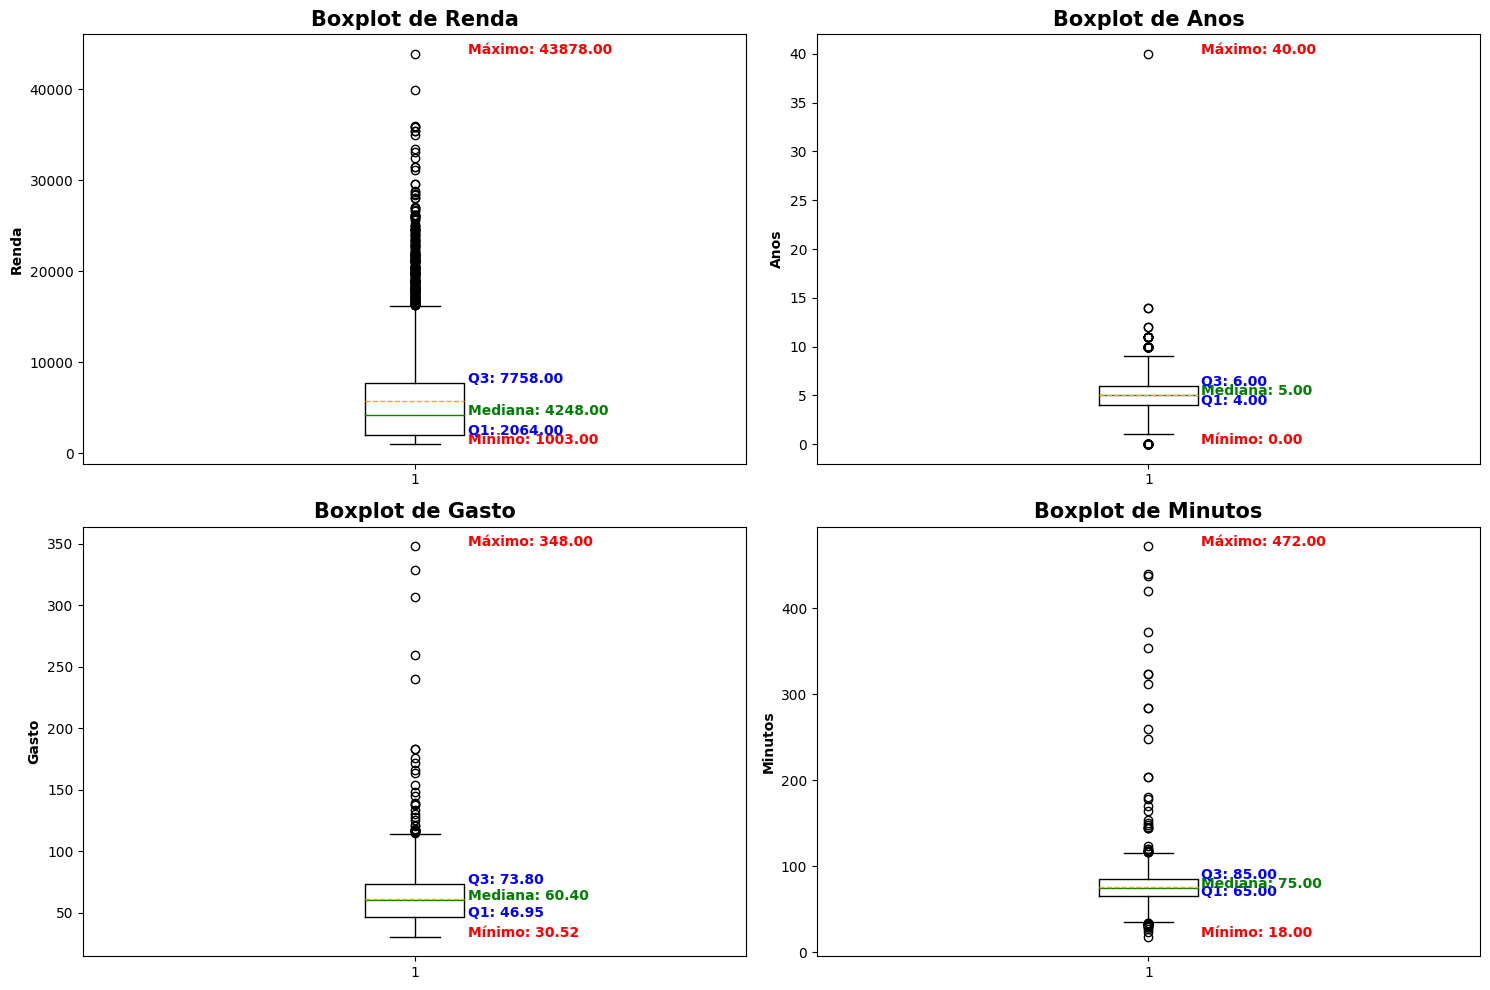

In [ ]:
_, axs = plt.subplots(2, 2, figsize=(15, 10)) # Criar subplots para cada coluna numérica

for i, col in enumerate(df.iloc[:, 6:]):
    # Criando o boxplot com algumas configurações, a linha tracejada laranja é de média
    axs[i>>1][i&1].boxplot(df[col], showmeans=True, meanline=True, meanprops=dict(color='orange'), medianprops=dict(color='green'))

    # Adicionando títulos
    axs[i>>1][i&1].set_ylabel(col, fontweight='bold')
    axs[i>>1][i&1].set_title(f'Boxplot de {col}', fontsize=15, fontweight='bold')

    # Calculando valores dos percentis
    q0 = np.percentile(df[col], 0)   # np.min(df[col])
    q1 = np.percentile(df[col], 25)
    q2 = np.percentile(df[col], 50)  # np.median(df[col])
    q3 = np.percentile(df[col], 75)
    q4 = np.percentile(df[col], 100) # np.max(df[col])

    # Adicionando textos dos valores calculados
    axs[i>>1][i&1].text(1.08, q0, f'Mínimo: {q0:.2f}', fontsize=10, color='red', fontweight='bold')
    axs[i>>1][i&1].text(1.08, q1, f'Q1: {q1:.2f}', fontsize=10, color='blue', fontweight='bold')
    axs[i>>1][i&1].text(1.08, q2, f'Mediana: {q2:.2f}', fontsize=10, color='green', fontweight='bold')
    axs[i>>1][i&1].text(1.08, q3, f'Q3: {q3:.2f}', fontsize=10, color='blue', fontweight='bold')
    axs[i>>1][i&1].text(1.08, q4, f'Máximo: {q4:.2f}', fontsize=10, color='red', fontweight='bold')

plt.tight_layout() # Ajustar layout
plt.show() # Exibir o gráfico

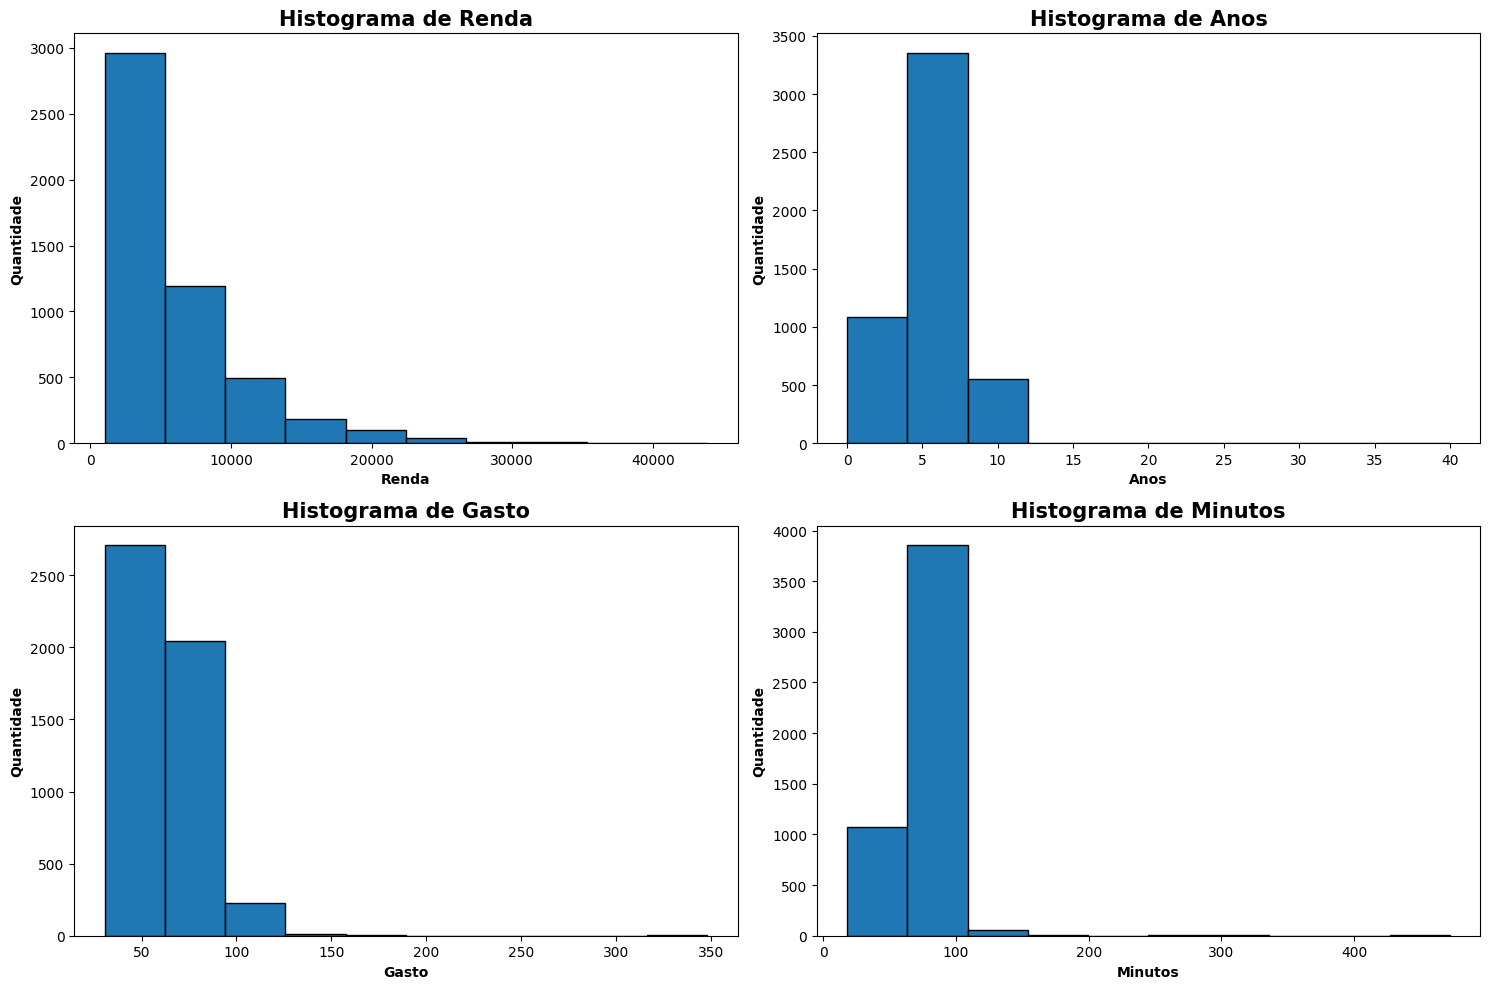

In [ ]:
_, axs = plt.subplots(2, 2, figsize=(15, 10)) # Criar subplots para cada coluna numérica

for i, col in enumerate(df.iloc[:, 6:]):
    # Criando o histograma com algumas configurações
    axs[i>>1][i&1].hist(df[col], edgecolor='black')

    # Adicionando títulos e legendas
    axs[i>>1][i&1].set_xlabel(col, fontweight='bold')
    axs[i>>1][i&1].set_ylabel('Quantidade', fontweight='bold')
    axs[i>>1][i&1].set_title(f'Histograma de {col}', fontsize=15, fontweight='bold')

plt.tight_layout() # Ajustar layout
plt.show() # Exibir o gráfico

In [ ]:
# Salvando o arquivo formatado em csv e voltando para separação por ponto e vírgula e decimais com vírgula sem indeces
df.to_csv('dados_formatados.csv', sep=';', decimal=',', index=False)